In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_AG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,NaN,0.61,NaN,NaN,0.5,0.0,0.48,NaN
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	185
float64		column 2	111
float64		column 3	259
float64		column 4	296
float64		column 5	37
float64		column 6	0
float64		column 7	185
float64		column 8	111


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1299.000000,1373.000000,1225.000000,1188.000000,1447.000000,1484.000000,1299.000000,1373.000000
mean,0.500808,0.499913,0.500057,0.257677,0.504838,0.007500,0.500531,0.274487
std,0.135917,0.123989,0.084642,0.132782,0.048960,0.075683,0.056609,0.104896
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.167500,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.560000,0.310000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.720000,1.000000


<AxesSubplot:>

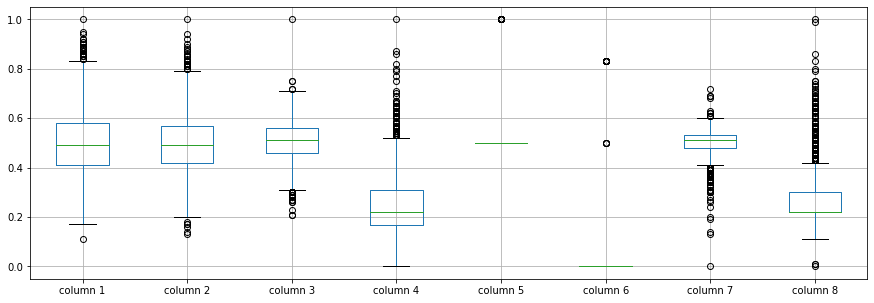

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.500808
column 2    0.499913
column 3    0.500057
column 4    0.257677
column 5    0.504838
column 6    0.007500
column 7    0.500531
column 8    0.274487
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.560980,-0.150570,0.141803,0.076250,-0.006864,0.040723,-0.126038
column 2,0.560980,1.000000,-0.262145,0.129155,0.065148,-0.000331,0.071706,-0.115363
column 3,-0.150570,-0.262145,1.000000,0.040556,-0.013033,0.010776,-0.167057,-0.013911
column 4,0.141803,0.129155,0.040556,1.000000,-0.020105,-0.014065,-0.095135,-0.034195
column 5,0.076250,0.065148,-0.013033,-0.020105,1.000000,-0.009210,0.050398,0.004645
column 6,-0.006864,-0.000331,0.010776,-0.014065,-0.009210,1.000000,0.016203,-0.032114
column 7,0.040723,0.071706,-0.167057,-0.095135,0.050398,0.016203,1.000000,0.082140
column 8,-0.126038,-0.115363,-0.013911,-0.034195,0.004645,-0.032114,0.082140,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+41,8+41+41,8+41+41+41,8+41+41+41+41,8+41+41+41+41+41,8+41+41+41+41+41+41,8+41+41+41+41+41,8+41+41+41+41,8+41+41+41,8+41+41,8+41,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.6180672982464666
Epoch: 1 , loss: 2.2046466547509898
Epoch: 2 , loss: 2.0232321347879325
Epoch: 3 , loss: 1.8851700969364331
Epoch: 4 , loss: 1.767513825841572
Epoch: 5 , loss: 1.7080845664376798
Epoch: 6 , loss: 1.6140994870144387
Epoch: 7 , loss: 1.5357005997844364
Epoch: 8 , loss: 1.4573779987252278
Epoch: 9 , loss: 1.4319087914798572
Epoch: 10 , loss: 1.3773216358993365
Epoch: 11 , loss: 1.3253093925507173
Epoch: 12 , loss: 1.3056458234786987
Epoch: 13 , loss: 1.2679689727399661
Epoch: 14 , loss: 1.2442737616922543
Epoch: 15 , loss: 1.2058825266102087
Epoch: 16 , loss: 1.17746492896391
Epoch: 17 , loss: 1.1556528119937233
Epoch: 18 , loss: 1.1450812168743298
Epoch: 19 , loss: 1.1045166623333227
Epoch: 20 , loss: 1.1111778934364733
Epoch: 21 , loss: 1.0721742679243502
Epoch: 22 , loss: 1.0866350836080054
Epoch: 23 , loss: 1.064114211694054
Epoch: 24 , loss: 1.0514127702816674
Epoch: 25 , loss: 1.03

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,-0.135579,0.0,-0.014402,0.101089,0.0,0.0,0.0,0.032312
1,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
1479,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
1480,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
1481,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
1482,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(5.636229711005148, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.12016485669636563

In [18]:
new_df.iloc[66,:]

column 1    0.46
column 2    0.49
column 3    0.58
column 4    0.23
column 5    0.50
column 6    0.00
column 7    0.44
column 8    0.22
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.444421,0.61,0.455598,0.231089,0.5,0.0,0.48,0.252312
1,0.430000,0.67,0.480000,0.270000,0.5,0.0,0.53,0.220000
2,0.640000,0.62,0.490000,0.150000,0.5,0.0,0.53,0.220000
3,0.580000,0.44,0.570000,0.130000,0.5,0.0,0.54,0.220000
4,0.420000,0.44,0.480000,0.540000,0.5,0.0,0.48,0.220000
...,...,...,...,...,...,...,...,...
1479,0.820000,0.63,0.470000,0.180000,0.5,0.0,0.50,0.220000
1480,0.350000,0.29,0.460000,0.140000,0.5,0.0,0.54,0.660000
1481,0.410000,0.47,0.500000,0.140000,0.5,0.0,0.53,0.370000
1482,0.510000,0.45,0.620000,0.250000,0.5,0.0,0.59,0.220000


In [20]:
imputations[-1].to_excel("Yeast_AG_10(imp).xlsx", index=False, header=False)